<a href="https://colab.research.google.com/github/lohith1266/oasis-infobyte-intership-Data-Anallytics/blob/main/Task_4_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Shape: (39919, 2)
                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0

Model Accuracy: 0.7102955911823647

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.89      0.40      0.55      1775
         0.0       0.85      0.63      0.73      2797
         1.0       0.62      0.94      0.75      3412

    accuracy                           0.71      7984
   macro avg       0.79      0.66      0.67      7984
weighted avg       0.76      0.71      0.70      7984



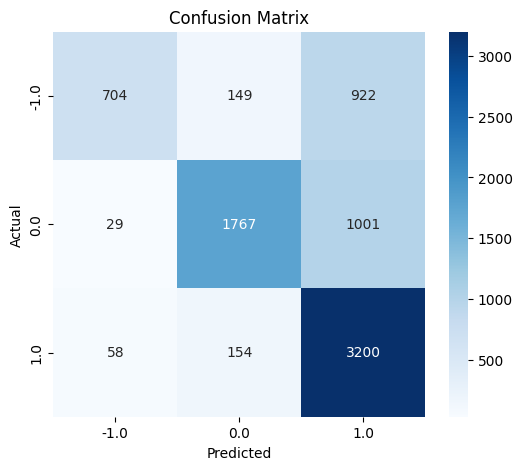


Sample Predictions:
I love this product! --> 1.0
This is the worst experience ever. --> -1.0
Not bad, could be better. --> 1.0


In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 2: Load Dataset
df = pd.read_csv("/content/Twitter_Data.csv")

print("Dataset Shape:", df.shape)
print(df.head())

# Step 3: Data Cleaning
def clean_text(text):
    text = str(text).lower()                      # lowercase
    text = re.sub(r'http\S+|www.\S+', '', text)   # remove links
    text = re.sub(r'[^a-z\s]', '', text)          # remove punctuation/numbers
    text = re.sub(r'\s+', ' ', text).strip()      # remove extra spaces
    return text

df['clean_text'] = df['clean_text'].apply(clean_text)

# Drop rows with NaN in the 'category' column
df.dropna(subset=['category'], inplace=True)


# Step 4: Features and Labels
X = df['clean_text']
y = df['category']   # assuming column "category" contains sentiment labels (positive/negative/neutral)

# Step 5: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Text Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Step 7: Train Model (Naive Bayes)
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Step 8: Predictions
y_pred = model.predict(X_test_vec)

# Step 9: Evaluation
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues",
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Step 10: Example Predictions
sample_texts = ["I love this product!", "This is the worst experience ever.", "Not bad, could be better."]
sample_texts_clean = [clean_text(t) for t in sample_texts]
sample_vec = vectorizer.transform(sample_texts_clean)
preds = model.predict(sample_vec)

print("\nSample Predictions:")
for txt, pred in zip(sample_texts, preds):
    print(f"{txt} --> {pred}")